In [28]:
import pandas as pd
import src.DataProcessing.read_data as rd

ruta = '../data/TABLAS ORDINARIOS CCTROLEBUS Vs11 20-10-2023-IMPR.xlsx'
hoja_c4_c6 = 'CONSOL C4-C6-L-V'
base = rd.lectura_tablas_c4_c6(ruta,hoja_c4_c6)
base = rd.transformacion_a_minutos(base)
base.head()


,ORD,COD. OP.,CIRCUITO,SALIDA,LLEGADA
0,1,1Q,C4,300.0,408.0
1,2,21Q,C6,306.0,356.0
2,3,2Q,C4,307.0,415.0
3,4,3Q,C4,314.0,422.0
4,5,22Q,C6,316.0,366.0


In [29]:
delta = 10 # Parametro de tolerancia
P = 30 # Parametro que indica longitud de pause

# Parametros para controlar tiempito minimo y máximo de espera
l1 = 0
u1 = 15

# Parámetros para controlar tiempo mínimo y máximo de descanso
l2 = P
u2 = P + delta 

# Parametros

break1 = 240
break2 = 720
break3 = 960
totalHorasTrabajadas =  1440

M_P = 5
M_T = 1440

base = rd.creacion_arcos_A1_A2(base,l1,u1,l2,u2)
base

,ORD,COD. OP.,CIRCUITO,SALIDA,LLEGADA,Arcos-Costo,Arcos-Costo A1,Arcos-Costo A2
0,1,1Q,C4,300.0,408.0,"[(32.0, 5.0), (33.0, 8.0), (34.0, 13.0), (35.0...","[(32.0, 5.0), (33.0, 8.0), (34.0, 13.0)]","[(38.0, 33.0)]"
1,2,21Q,C6,306.0,356.0,"[(16.0, 0.0), (17.0, 4.0), (18.0, 9.0), (19.0,...","[(16.0, 0.0), (17.0, 4.0), (18.0, 9.0), (19.0,...","[(25.0, 30.0), (26.0, 34.0), (27.0, 39.0), (28..."
2,3,2Q,C4,307.0,415.0,"[(33.0, 1.0), (34.0, 6.0), (35.0, 11.0), (36.0...","[(33.0, 1.0), (34.0, 6.0), (35.0, 11.0)]","[(39.0, 36.0), (40.0, 36.0)]"
3,4,3Q,C4,314.0,422.0,"[(35.0, 4.0), (36.0, 9.0), (37.0, 14.0), (38.0...","[(35.0, 4.0), (36.0, 9.0), (37.0, 14.0)]","[(41.0, 39.0)]"
4,5,22Q,C6,316.0,366.0,"[(19.0, 0.0), (20.0, 4.0), (21.0, 9.0), (22.0,...","[(19.0, 0.0), (20.0, 4.0), (21.0, 9.0), (22.0,...","[(28.0, 30.0), (29.0, 34.0), (30.0, 39.0), (31..."
...,...,...,...,...,...,...,...,...
217,218,4Q,C6,1294.0,1344.0,[],[],[]
218,219,5Q,C6,1301.0,1351.0,[],[],[]
219,220,6Q,C6,1309.0,1359.0,[],[],[]
220,221,7Q,C6,1317.0,1367.0,[],[],[]


In [30]:
base[base['ORD']==42]

,ORD,COD. OP.,CIRCUITO,SALIDA,LLEGADA,Arcos-Costo,Arcos-Costo A1,Arcos-Costo A2
41,42,24Q,C6,466.0,518.0,"[(52.0, 4.0), (53.0, 8.0), (54.0, 11.0), (55.0...","[(52.0, 4.0), (53.0, 8.0), (54.0, 11.0)]","[(58.0, 32.0), (59.0, 38.0), (60.0, 39.0)]"


In [31]:
base[base['ORD']==42]['Arcos-Costo A2']

41    [(58.0, 32.0), (59.0, 38.0), (60.0, 39.0)]
Name: Arcos-Costo A2, dtype: object

In [32]:
base[base['ORD']==60]

,ORD,COD. OP.,CIRCUITO,SALIDA,LLEGADA,Arcos-Costo,Arcos-Costo A1,Arcos-Costo A2
59,60,18Q,C4,557.0,672.0,"[(88.0, 4.0), (89.0, 9.0), (90.0, 11.0), (91.0...","[(88.0, 4.0), (89.0, 9.0), (90.0, 11.0)]","[(95.0, 32.0), (96.0, 37.0), (97.0, 39.0)]"


In [33]:
b = base['LLEGADA']
b = {key+1:value for key,value in b.to_dict().items()}
b

a = base['SALIDA']
a = {key+1:value for key,value in a.to_dict().items()}
a

{1: 300.0,
 2: 306.0,
 3: 307.0,
 4: 314.0,
 5: 316.0,
 6: 321.0,
 7: 326.0,
 8: 328.0,
 9: 335.0,
 10: 336.0,
 11: 340.0,
 12: 345.0,
 13: 346.0,
 14: 350.0,
 15: 355.0,
 16: 356.0,
 17: 360.0,
 18: 365.0,
 19: 366.0,
 20: 370.0,
 21: 375.0,
 22: 376.0,
 23: 380.0,
 24: 385.0,
 25: 386.0,
 26: 390.0,
 27: 395.0,
 28: 396.0,
 29: 400.0,
 30: 405.0,
 31: 406.0,
 32: 413.0,
 33: 416.0,
 34: 421.0,
 35: 426.0,
 36: 431.0,
 37: 436.0,
 38: 441.0,
 39: 451.0,
 40: 451.0,
 41: 461.0,
 42: 466.0,
 43: 471.0,
 44: 481.0,
 45: 481.0,
 46: 491.0,
 47: 496.0,
 48: 501.0,
 49: 508.0,
 50: 511.0,
 51: 515.0,
 52: 522.0,
 53: 526.0,
 54: 529.0,
 55: 536.0,
 56: 541.0,
 57: 543.0,
 58: 550.0,
 59: 556.0,
 60: 557.0,
 61: 564.0,
 62: 571.0,
 63: 571.0,
 64: 578.0,
 65: 581.0,
 66: 585.0,
 67: 591.0,
 68: 592.0,
 69: 599.0,
 70: 601.0,
 71: 606.0,
 72: 611.0,
 73: 613.0,
 74: 620.0,
 75: 621.0,
 76: 627.0,
 77: 631.0,
 78: 634.0,
 79: 641.0,
 80: 641.0,
 81: 648.0,
 82: 651.0,
 83: 655.0,
 84: 661.0,
 

In [34]:
import numpy as np

# Unidades
M = len(base['COD. OP.'].unique()) 

# Viajes 
N = base['ORD'].unique()
N0 = np.insert(N, 0, 0)

# Creación del diccionario de costos
costos = {}
costos_A1 = {}
costos_A2 = {}
costos_inicio_fin = {}
for index,row in base.iterrows():
    costos_arcos_A1 = {(row['ORD'],int(i[0])):i[1] for i in row['Arcos-Costo A1']}
    costos_A1.update(costos_arcos_A1)
    
    costos_arcos_A2 = {(row['ORD'],int(i[0])):i[1] for i in row['Arcos-Costo A2']}
    costos_A2.update(costos_arcos_A2)
    
    costos_arcos = {(row['ORD'],int(i[0])):i[1] for i in row['Arcos-Costo']}
    costos.update(costos_arcos)
    
    costos_inicio_fin[(0,row['ORD'])] = 0
    costos_inicio_fin[(row['ORD'],len(N)+1)] = 0
    
costos.update(costos_inicio_fin)

arcos_A1 = costos_A1.keys()
arcos_A2 = costos_A2.keys()
arcos_unidades_A1 = []
arcos_unidades_A2 = []
arcos_unidades_inicio_fin = []

arcos_unidad_i_A1 = [(arco[0],arco[1],1) for arco in arcos_A1 if arco[0]!=0 and arco[1]!=(len(N)+1)]
arcos_unidades_A1 += arcos_unidad_i_A1

arcos_unidad_i_A2 = [(arco[0],arco[1],1) for arco in arcos_A2 if arco[0]!=0 and arco[1]!=(len(N)+1)]
arcos_unidades_A2 += arcos_unidad_i_A2

arcos_unidades_inicio = [(0,row['ORD'],1) for index,row in base.iterrows()]
arcos_unidades_fin = [(row['ORD'],len(N)+1,1) for index,row in base.iterrows()]
arcos_unidades_inicio_fin = arcos_unidades_inicio + arcos_unidades_fin    
    
print('A1',len(arcos_unidades_A1))
print('A2',len(arcos_unidades_A2))
print('Inicio-Fin',len(arcos_unidades_inicio_fin))
print('Inicio',len(arcos_unidades_inicio))
print('Fin',len(arcos_unidades_fin))

arcos = arcos_unidades_A1+arcos_unidades_A2+arcos_unidades_inicio_fin

indices_A1 = list(set([elemento for tupla in arcos_unidades_A1 for elemento in tupla]))

print(len(indices_A1))

indices_A2 = list(set([elemento for tupla in arcos_unidades_A2 for elemento in tupla]))
print(len(indices_A2))

A1 695
A2 477
Inicio-Fin 444
Inicio 222
Fin 222
222
222


In [35]:
arcos_unidades_A2

[(1, 38, 1),
 (2, 25, 1),
 (2, 26, 1),
 (2, 27, 1),
 (2, 28, 1),
 (3, 39, 1),
 (3, 40, 1),
 (4, 41, 1),
 (5, 28, 1),
 (5, 29, 1),
 (5, 30, 1),
 (5, 31, 1),
 (6, 41, 1),
 (6, 42, 1),
 (7, 31, 1),
 (7, 32, 1),
 (7, 33, 1),
 (8, 42, 1),
 (8, 43, 1),
 (9, 44, 1),
 (9, 45, 1),
 (10, 33, 1),
 (10, 34, 1),
 (10, 35, 1),
 (11, 44, 1),
 (11, 45, 1),
 (12, 46, 1),
 (13, 35, 1),
 (13, 36, 1),
 (13, 37, 1),
 (14, 46, 1),
 (14, 47, 1),
 (15, 47, 1),
 (15, 48, 1),
 (16, 37, 1),
 (16, 38, 1),
 (17, 48, 1),
 (17, 49, 1),
 (18, 50, 1),
 (18, 51, 1),
 (19, 39, 1),
 (19, 40, 1),
 (20, 51, 1),
 (20, 52, 1),
 (21, 52, 1),
 (21, 53, 1),
 (21, 54, 1),
 (22, 41, 1),
 (22, 42, 1),
 (23, 53, 1),
 (23, 54, 1),
 (24, 55, 1),
 (25, 43, 1),
 (26, 55, 1),
 (26, 56, 1),
 (26, 57, 1),
 (27, 56, 1),
 (27, 57, 1),
 (27, 58, 1),
 (28, 44, 1),
 (28, 45, 1),
 (29, 58, 1),
 (30, 58, 1),
 (30, 59, 1),
 (30, 60, 1),
 (31, 46, 1),
 (31, 47, 1),
 (32, 61, 1),
 (33, 48, 1),
 (33, 49, 1),
 (34, 62, 1),
 (34, 63, 1),
 (35, 49, 1),

In [36]:
len(arcos_unidades_A1)
len(arcos_unidades_inicio_fin)
nuevos_arcos_A1 = arcos_unidades_inicio_fin + arcos_unidades_A1
len(nuevos_arcos_A1)

1139

In [37]:
len(base['COD. OP.'].unique())

26

In [38]:
b_aux = {}
b_aux[0] = b
b_aux[0][2]
for i in range(1,223):
    b_aux[i] = {k:b[i] for k in range(1,224)} 
b_aux[223] = b

In [8]:
b_aux

{0: {1: 408.0,
  2: 356.0,
  3: 415.0,
  4: 422.0,
  5: 366.0,
  6: 429.0,
  7: 376.0,
  8: 436.0,
  9: 443.0,
  10: 386.0,
  11: 448.0,
  12: 453.0,
  13: 396.0,
  14: 458.0,
  15: 463.0,
  16: 406.0,
  17: 468.0,
  18: 480.0,
  19: 418.0,
  20: 485.0,
  21: 490.0,
  22: 428.0,
  23: 495.0,
  24: 500.0,
  25: 438.0,
  26: 505.0,
  27: 510.0,
  28: 448.0,
  29: 515.0,
  30: 520.0,
  31: 458.0,
  32: 528.0,
  33: 468.0,
  34: 536.0,
  35: 478.0,
  36: 546.0,
  37: 488.0,
  38: 556.0,
  39: 566.0,
  40: 503.0,
  41: 576.0,
  42: 518.0,
  43: 586.0,
  44: 596.0,
  45: 533.0,
  46: 606.0,
  47: 548.0,
  48: 616.0,
  49: 623.0,
  50: 563.0,
  51: 630.0,
  52: 637.0,
  53: 578.0,
  54: 644.0,
  55: 651.0,
  56: 593.0,
  57: 658.0,
  58: 665.0,
  59: 608.0,
  60: 672.0,
  61: 679.0,
  62: 686.0,
  63: 623.0,
  64: 693.0,
  65: 633.0,
  66: 700.0,
  67: 643.0,
  68: 707.0,
  69: 714.0,
  70: 653.0,
  71: 721.0,
  72: 663.0,
  73: 728.0,
  74: 735.0,
  75: 673.0,
  76: 742.0,
  77: 683.0,
  78:

In [9]:
arcos_unidades_A2

[(1, 38, 1),
 (2, 25, 1),
 (2, 26, 1),
 (2, 27, 1),
 (2, 28, 1),
 (3, 39, 1),
 (3, 40, 1),
 (4, 41, 1),
 (5, 28, 1),
 (5, 29, 1),
 (5, 30, 1),
 (5, 31, 1),
 (6, 41, 1),
 (6, 42, 1),
 (7, 31, 1),
 (7, 32, 1),
 (7, 33, 1),
 (8, 42, 1),
 (8, 43, 1),
 (9, 44, 1),
 (9, 45, 1),
 (10, 33, 1),
 (10, 34, 1),
 (10, 35, 1),
 (11, 44, 1),
 (11, 45, 1),
 (12, 46, 1),
 (13, 35, 1),
 (13, 36, 1),
 (13, 37, 1),
 (14, 46, 1),
 (14, 47, 1),
 (15, 47, 1),
 (15, 48, 1),
 (16, 37, 1),
 (16, 38, 1),
 (17, 48, 1),
 (17, 49, 1),
 (18, 50, 1),
 (18, 51, 1),
 (19, 39, 1),
 (19, 40, 1),
 (20, 51, 1),
 (20, 52, 1),
 (21, 52, 1),
 (21, 53, 1),
 (21, 54, 1),
 (22, 41, 1),
 (22, 42, 1),
 (23, 53, 1),
 (23, 54, 1),
 (24, 55, 1),
 (25, 43, 1),
 (26, 55, 1),
 (26, 56, 1),
 (26, 57, 1),
 (27, 56, 1),
 (27, 57, 1),
 (27, 58, 1),
 (28, 44, 1),
 (28, 45, 1),
 (29, 58, 1),
 (30, 58, 1),
 (30, 59, 1),
 (30, 60, 1),
 (31, 46, 1),
 (31, 47, 1),
 (32, 61, 1),
 (33, 48, 1),
 (33, 49, 1),
 (34, 62, 1),
 (34, 63, 1),
 (35, 49, 1),

In [39]:
import gurobipy as gp
from gurobipy import GRB

capacidad = 26

m3 = gp.Model('Asignacion-Flota-V1')
# Terminar al alcanzar un Gap del 20%
m3.Params.MIPGap = 0.10
m3.setParam('OutputFlag', 1)
# Enfocar estrategia en mejorar la cota dual
m3.Params.MIPFocus = 2
m3.Params.NoRelHeurTime = 30

# Fijar generación muy agresiva de cortes
m3.Params.Cuts = 2

# Terminar luego de 180 segundos
m3.Params.TimeLimit = 23800

x = m3.addVars(arcos,vtype=GRB.BINARY,name='x')
z = m3.addVars(N,vtype=GRB.BINARY,name='z')


T = m3.addVars(N,vtype=GRB.INTEGER,name='T',ub=1440)
PV = m3.addVars(N,vtype=GRB.INTEGER,name='P',lb=0,ub=2)

#T[0].ub = 0
#PV[0].ub = 0

y0 = m3.addVars(N,vtype=GRB.BINARY,name='y1')
y1 = m3.addVars(N,vtype=GRB.BINARY,name='y2')
y2 = m3.addVars(N,vtype=GRB.BINARY,name='y3')


m3.setParam('LogFile', 'gurobi.log')

m3.setObjective(gp.quicksum(costos[i,j]*x[i,j,k] for i,j,k in arcos)+ 1000*z.sum('*') ,GRB.MINIMIZE)

m3.addConstrs((T[j] >= (b[j]-a[j]) - M_T*(1-x[i,j,k]) for i,j,k in arcos_unidades_inicio),name='T_lower_inicio')
m3.addConstrs((T[j] <=  (b[j]-a[j]) + M_T*(1-x[i,j,k]) for i,j,k in arcos_unidades_inicio),name='T_upper_inico ')

m3.addConstrs((PV[j]<= M_P*(1-x[i,j,k]) for i,j,k in arcos_unidades_inicio),name = 'P_upper_inicio')
m3.addConstrs((PV[j]>= - M_P*(1-x[i,j,k]) for i,j,k in arcos_unidades_inicio),name = 'P_lower_inicio')

m3.addConstrs((x.sum(n,'*','*') == 1 - z[n] for n in N), name=f"Constraints")
m3.addConstrs((x.sum('*',i,1)-x.sum(i,'*',1)==0 for i in N ),name=f'Conservacion')
m3.addConstr(x.sum(0,'*',1) <= capacidad, name=f"Capacidades")


m3.addConstrs((T[j] >= T[i] + (b[j]-b[i]) - M_T*(1-x[i,j,k]) for i,j,k in arcos_unidades_A1 ),name='T_upper_A1')
m3.addConstrs((T[j] <= T[i] + (b[j]-b[i]) + M_T*(1-x[i,j,k]) for i,j,k in arcos_unidades_A1 ),name='T_lower_A1')

m3.addConstrs((PV[j] >= PV[i] - M_P*(1-x[i,j,k]) for i,j,k in arcos_unidades_A1 ),name='P_upper_A1')
m3.addConstrs((PV[j] <= PV[i] + M_P*(1-x[i,j,k]) for i,j,k in arcos_unidades_A1 ),name='P_lower_A1')


m3.addConstrs((T[j] >= T[i] + (b[j]-b[i]) - M_T*(1-x[i,j,k]) for i,j,k in arcos_unidades_A2 ),name='T_upper_A2')
m3.addConstrs((T[j] <= T[i] + (b[j]-b[i]) + M_T*(1-x[i,j,k]) for i,j,k in arcos_unidades_A2 ),name='T_lower_A2')

m3.addConstrs((PV[j] >= PV[i] + 1 - M_P*(1-x[i,j,k]) for i,j,k in arcos_unidades_A2 ),name='P_upper_A2')
m3.addConstrs((PV[j] <= PV[i] + 1 + M_P*(1-x[i,j,k]) for i,j,k in arcos_unidades_A2 ),name='P_lower_A2')


m3.addConstrs((T[i]<= 240 - 0.5*P + delta+M_T*(1-y0[i]) for i in N), name = 'N1_Restriccion' )
m3.addConstrs((T[i] - (b[i]-a[i]) >= 240 + 0.5*P - delta-M_T*(1-y1[i]) for i in N), name = 'N2_Restriccion' )
m3.addConstrs((T[i]<= 720 - 0.5*P + delta+M_T*(1-y1[i]) for i in N), name = 'N3_Restriccion' )
m3.addConstrs((T[i] - (b[i]-a[i]) >= 720 + 0.5*P - delta-M_T*(1-y2[i]) for i in N), name = 'N4_Restriccion' )
m3.addConstrs((T[i]<= 960 + M_T*(1-y2[i]) for i in N), name = 'N4_Restriccion' )

m3.addConstrs((y0[n]+y1[n]+y2[n]==1 for n in N ),name='Aux1')
m3.addConstrs((y1[n]+2*y2[n]==PV[n] for n in N ),name='Aux2')


m3.write('Modelo.lp')


m3.optimize()

# 340m  15.7s

Set parameter MIPGap to value 0.1
Set parameter MIPFocus to value 2
Set parameter NoRelHeurTime to value 30
Set parameter Cuts to value 2
Set parameter TimeLimit to value 23800
Set parameter LogFile to value "gurobi.log"
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 22.3.0 22D68)

CPU model: Apple M1 Max
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 7575 rows, 2948 columns and 24018 nonzeros
Model fingerprint: 0x4518e7d6
Variable types: 0 continuous, 2948 integer (2504 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+03]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 1e+03]
  RHS range        [1e+00, 2e+03]
Found heuristic solution: objective 222000.00000
Presolve removed 1069 rows and 279 columns
Presolve time: 0.05s
Presolved: 6506 rows, 2669 columns, 21791 nonzeros
Variable types: 0 continuous, 2669 integer (2225 binary)
Found heuristic solution: objective 200000.00000
Starting

In [40]:
vx = m3.getAttr('x', x)
solucion = {}
tuplas = []
contador = 1
for tupla,valor in vx.items():
    if valor >= 0.95 and tupla[0]==0:
        tuplas.append(tupla)
        
tuplas_iniciales = tuplas

In [41]:
def generar_sublistas(tuplas,tuplas_iniciales):
    sublistas = []
    while tuplas_iniciales:
        sublista = []
        actual = tuplas_iniciales.pop(0)
        sublista.append(actual)
        
        # Buscar conexiones hacia adelante
        while True:
            found = False
            for i, t in enumerate(tuplas):
                if t[0] == actual[1]:
                    sublista.append(t)
                    actual = t
                    tuplas.pop(i)
                    found = True
                    break
            if not found:
                break
        
        sublistas.append(sublista)
    
    return sublistas


def hora_a_minutos(n):
    hora = str(n).split(':')
    if len(hora) == 3:
        return float(hora[0])*60 + float(hora[1])+ float(hora[2])/100
    if len(hora) == 2:
        return float(hora[0])*60 + float(hora[1])



In [ ]:
def generar_sublistas(tuplas,tuplas_iniciales):
    sublistas = []
    while tuplas_iniciales:
        sublista = []
        actual = tuplas_iniciales.pop(0)
        sublista.append(actual)
        
        # Buscar conexiones hacia adelante
        while True:
            found = False
            for i, t in enumerate(tuplas):
                if t[0] == actual[1]:
                    sublista.append(t)
                    actual = t
                    tuplas.pop(i)
                    found = True
                    break
            if not found:
                break
        
        sublistas.append(sublista)
    
    return sublistas


def hora_a_minutos(n):
    hora = str(n).split(':')
    if len(hora) == 3:
        return float(hora[0])*60 + float(hora[1])+ float(hora[2])/100
    if len(hora) == 2:
        return float(hora[0])*60 + float(hora[1])



In [42]:
vx = m3.getAttr('x', x)
solucion = {}
tuplas = []
contador = 1
for tupla,valor in vx.items():
    if valor >= 0.95 :
        tuplas.append(tupla)
        
resultados = generar_sublistas(tuplas,tuplas_iniciales)
resultados

[[(0, 1, 1),
  (1, 32, 1),
  (32, 61, 1),
  (61, 91, 1),
  (91, 125, 1),
  (125, 151, 1),
  (151, 170, 1),
  (170, 197, 1),
  (197, 223, 1)],
 [(0, 4, 1),
  (4, 35, 1),
  (35, 45, 1),
  (45, 62, 1),
  (62, 92, 1),
  (92, 107, 1),
  (107, 223, 1)],
 [(0, 5, 1),
  (5, 19, 1),
  (19, 34, 1),
  (34, 63, 1),
  (63, 77, 1),
  (77, 90, 1),
  (90, 121, 1),
  (121, 134, 1),
  (134, 157, 1),
  (157, 176, 1),
  (176, 192, 1),
  (192, 223, 1)],
 [(0, 7, 1),
  (7, 22, 1),
  (22, 36, 1),
  (36, 65, 1),
  (65, 80, 1),
  (80, 93, 1),
  (93, 223, 1)],
 [(0, 8, 1),
  (8, 37, 1),
  (37, 47, 1),
  (47, 66, 1),
  (66, 95, 1),
  (95, 127, 1),
  (127, 140, 1),
  (140, 223, 1)],
 [(0, 10, 1),
  (10, 25, 1),
  (25, 38, 1),
  (38, 67, 1),
  (67, 81, 1),
  (81, 112, 1),
  (112, 223, 1)],
 [(0, 11, 1),
  (11, 40, 1),
  (40, 50, 1),
  (50, 69, 1),
  (69, 98, 1),
  (98, 129, 1),
  (129, 141, 1),
  (141, 223, 1)],
 [(0, 13, 1),
  (13, 28, 1),
  (28, 39, 1),
  (39, 71, 1),
  (71, 101, 1),
  (101, 131, 1),
  (131, 223

In [43]:
contador = 1
solucion = {} 
for i in resultados:
    if len(i)>1:
        solucion[contador] = {0:0}
        
        solucion[contador][0]= i[0][0]
        for k in i:
            solucion[contador][k[0]]= k[1]
        contador +=1
        
solucion

{1: {0: 1,
  1: 32,
  32: 61,
  61: 91,
  91: 125,
  125: 151,
  151: 170,
  170: 197,
  197: 223},
 2: {0: 4, 4: 35, 35: 45, 45: 62, 62: 92, 92: 107, 107: 223},
 3: {0: 5,
  5: 19,
  19: 34,
  34: 63,
  63: 77,
  77: 90,
  90: 121,
  121: 134,
  134: 157,
  157: 176,
  176: 192,
  192: 223},
 4: {0: 7, 7: 22, 22: 36, 36: 65, 65: 80, 80: 93, 93: 223},
 5: {0: 8, 8: 37, 37: 47, 47: 66, 66: 95, 95: 127, 127: 140, 140: 223},
 6: {0: 10, 10: 25, 25: 38, 38: 67, 67: 81, 81: 112, 112: 223},
 7: {0: 11, 11: 40, 40: 50, 50: 69, 69: 98, 98: 129, 129: 141, 141: 223},
 8: {0: 13, 13: 28, 28: 39, 39: 71, 71: 101, 101: 131, 131: 223},
 9: {0: 15, 15: 42, 42: 53, 53: 72, 72: 86, 86: 118, 118: 144, 144: 223},
 10: {0: 16, 16: 31, 31: 41, 41: 73, 73: 105, 105: 135, 135: 223},
 11: {0: 17,
  17: 43,
  43: 75,
  75: 89,
  89: 106,
  106: 122,
  122: 149,
  149: 184,
  184: 205,
  205: 213,
  213: 223},
 12: {0: 18, 18: 44, 44: 78, 78: 109, 109: 138, 138: 163, 163: 186, 186: 223},
 13: {0: 26,
  26: 49,


In [44]:
asignacion = pd.DataFrame()
for k in range(1,27):   
    nodo = 0    
    ord = []
    tiempo_anden = []
    while nodo != 223:
        tiempo_anden.append(costos[nodo,solucion[k][nodo]])
        ord.append(solucion[k][nodo])
        nodo = solucion[k][nodo]
    
    a = base[list(base.columns[0:1]) + list(base.columns[3:5]) + list(base.columns[9:10])]
    a = a[a['ORD'].isin(ord)].reset_index(drop=True)
    a['Tiempo en anden'] = pd.Series(tiempo_anden)
    a['UNIDAD ASIGNADA'] = k
    
    asignacion = pd.concat([asignacion,a])
asignacion = asignacion.sort_values(by='SALIDA')
asignacion


,ORD,SALIDA,LLEGADA,Tiempo en anden,UNIDAD ASIGNADA
0,1,300.0,408.0,0.0,1
0,4,314.0,422.0,0.0,2
0,5,316.0,366.0,0.0,3
0,7,326.0,376.0,0.0,4
0,8,328.0,436.0,0.0,5
...,...,...,...,...,...
7,218,1294.0,1344.0,6.0,21
6,219,1301.0,1351.0,6.0,25
7,220,1309.0,1359.0,7.0,23
6,221,1317.0,1367.0,1.0,24


In [45]:
vT = m3.getAttr('x', T)
print(vT[1])

108.0


In [46]:
resultado_individual = asignacion[asignacion['UNIDAD ASIGNADA']==1]
print(resultado_individual.to_markdown(index=False),'\n')

vT = m3.getAttr('x', T)
vPV = m3.getAttr('x',PV)
vY0 = m3.getAttr('x',y0)
vY1 = m3.getAttr('x',y1)
vY2 = m3.getAttr('x',y2)

solucion = {}
tuplas = []
contador = 1
for i in resultado_individual['ORD'].to_list():
    print(f"Nodo {i}, T: {vT[i]}, P: {vPV[i]}, y0: {vY0[i]}, y1: {vY1[i]}, y2: {vY2[i]}")

|   ORD |   SALIDA |   LLEGADA |   Tiempo en anden |   UNIDAD ASIGNADA |
|------:|---------:|----------:|------------------:|------------------:|
|     1 |      300 |       408 |                 0 |                 1 |
|    32 |      413 |       528 |                 5 |                 1 |
|    61 |      564 |       679 |                36 |                 1 |
|    91 |      690 |       805 |                11 |                 1 |
|   125 |      815 |       930 |                10 |                 1 |
|   151 |      941 |       993 |                11 |                 1 |
|   170 |     1031 |      1146 |                38 |                 1 |
|   197 |     1147 |      1199 |                 1 |                 1 | 

Nodo 1, T: 108.0, P: -0.0, y0: 1.0, y1: -0.0, y2: -0.0
Nodo 32, T: 228.0, P: -0.0, y0: 1.0, y1: -0.0, y2: -0.0
Nodo 61, T: 379.0, P: 1.0, y0: 0.0, y1: 1.0, y2: -0.0
Nodo 91, T: 505.0, P: 1.0, y0: -0.0, y1: 1.0, y2: -0.0
Nodo 125, T: 630.0, P: 1.0, y0: 0.0, y1: 1.0, y2

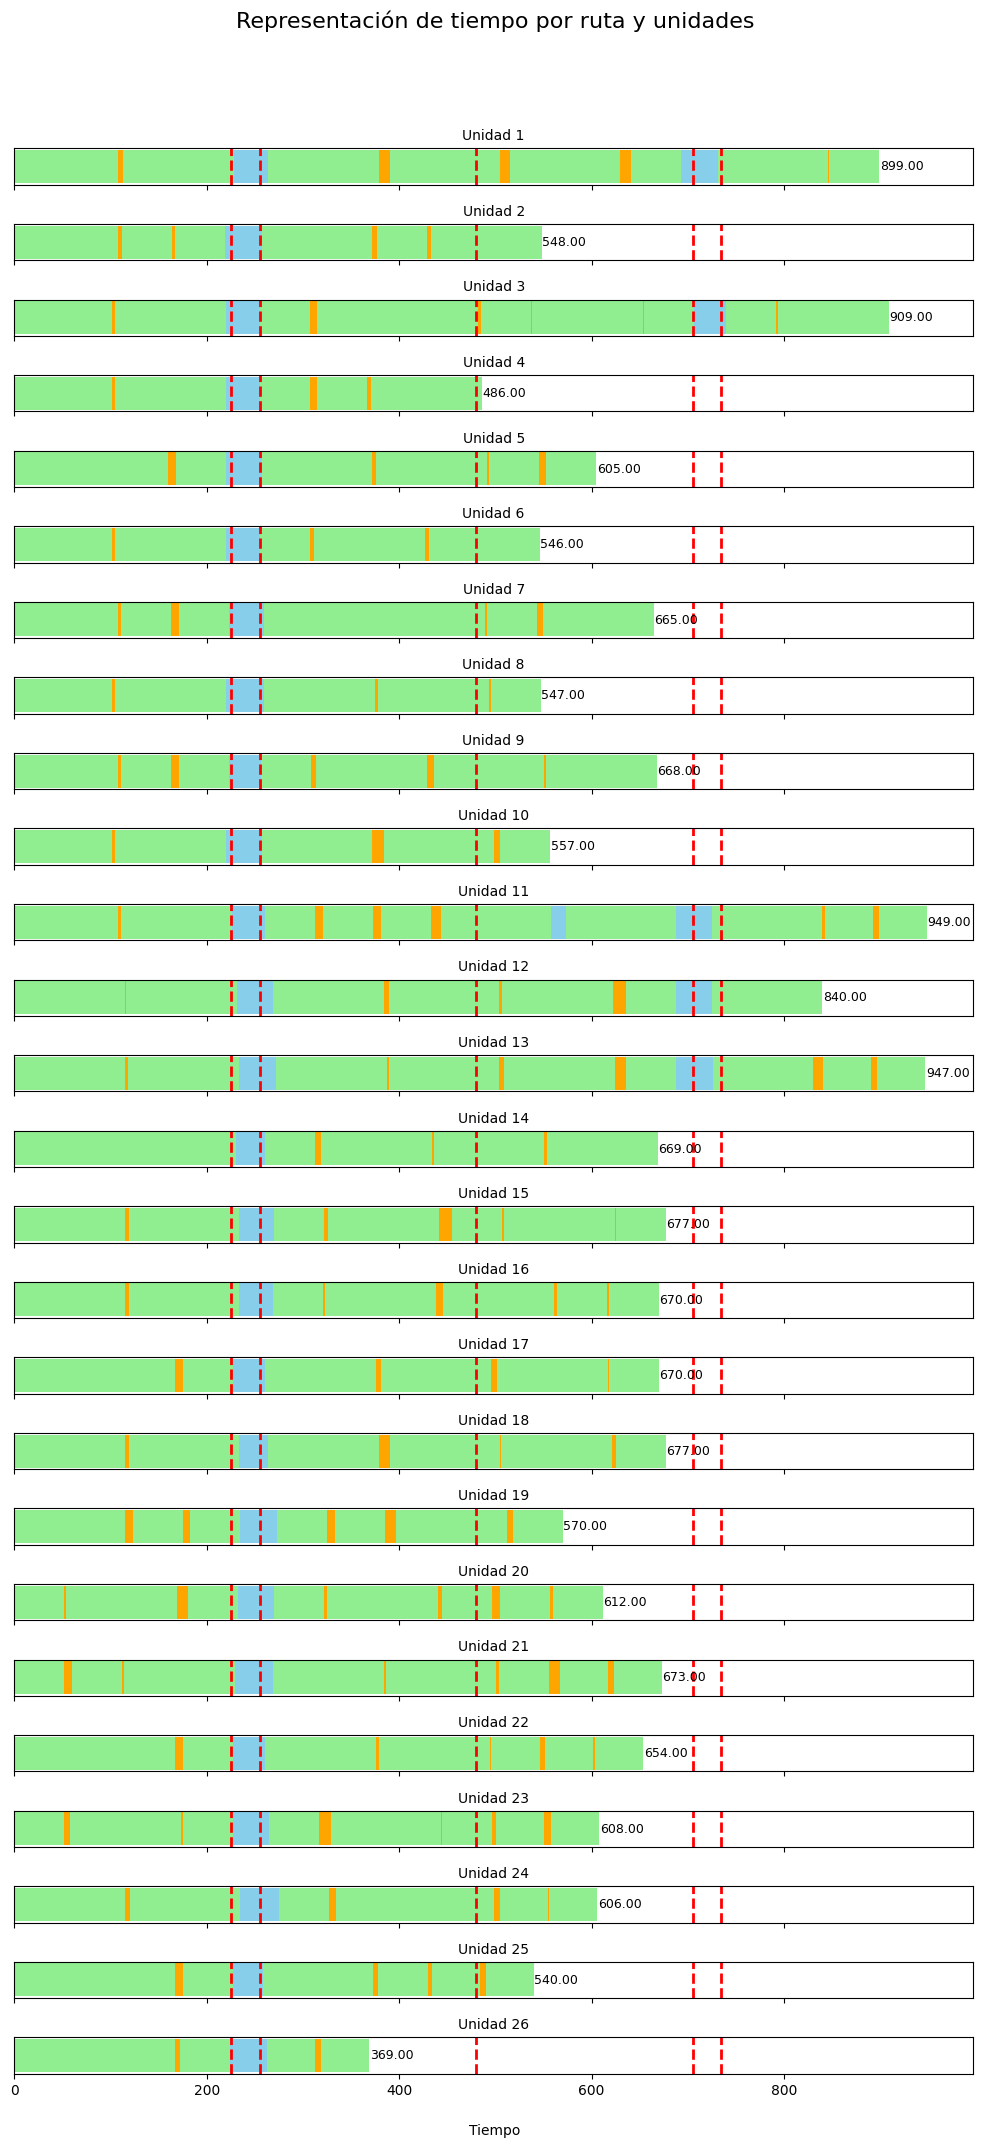

In [47]:
import matplotlib.pyplot as plt

asignacion['TIEMPO_VIAJE'] = asignacion['LLEGADA'] - asignacion['SALIDA']

# Valor umbral para cambiar de color
valor_umbral = 15

# Obtener las unidades únicas
unidades = asignacion['UNIDAD ASIGNADA'].unique()

# Crear un subgráfico por cada unidad
fig, axs = plt.subplots(len(unidades), 1, figsize=(10, len(unidades)*1/1.15), sharex=True)  # Ajustar el tamaño del gráfico

# Valores para las líneas verticales
lineas_verticales = [225, 255, 480, 705, 735]

for i, unidad in enumerate(unidades):
    asignacion_unidad = asignacion[asignacion['UNIDAD ASIGNADA'] == unidad]
    
    Type = []
    Time = []
    Colors = []
    for j, row in asignacion_unidad.iterrows():
        if not np.isnan(row['Tiempo en anden']):
            Type.append('A1')
            Time.append(row['Tiempo en anden'])
            # Asignar color según el valor del tiempo en andén
            if row['Tiempo en anden'] < valor_umbral:
                Colors.append('orange')
            else:
                Colors.append('skyblue')
        Type.append('A2')
        Time.append(row['TIEMPO_VIAJE'])
        Colors.append('lightgreen')  # Color fijo para A2
    
    data = pd.DataFrame({
        "Type": Type,
        "Time": Time,
        "Colors": Colors
    })
    
    left = 0
    bar_height = 0.3  # Ajustar el ancho de las barras
    for idx, row in data.iterrows():
        axs[i].barh(y=0, width=row['Time'], left=left, color=row['Colors'], height=bar_height)
        left += row['Time']
    
    # Añadir el texto al final de la barra
    total_time = left  # La longitud total de la barra es 'left' después del bucle
    axs[i].text(left + 0.5, 0, f'{total_time:.2f}', va='center', fontsize=9)  # Ajusta 0.5 para dar espacio al texto
    
    axs[i].set_yticks([])
    axs[i].set_title(f'Unidad {unidad}', fontsize=10)

    # Añadir líneas verticales rojas en los valores especificados
    for x_value in lineas_verticales:
        axs[i].axvline(x=x_value, color='red', linestyle='--', linewidth=2)

# Etiquetas comunes
fig.text(0.5, 0.04, 'Tiempo', ha='center')
fig.suptitle('Representación de tiempo por ruta y unidades', fontsize=16)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

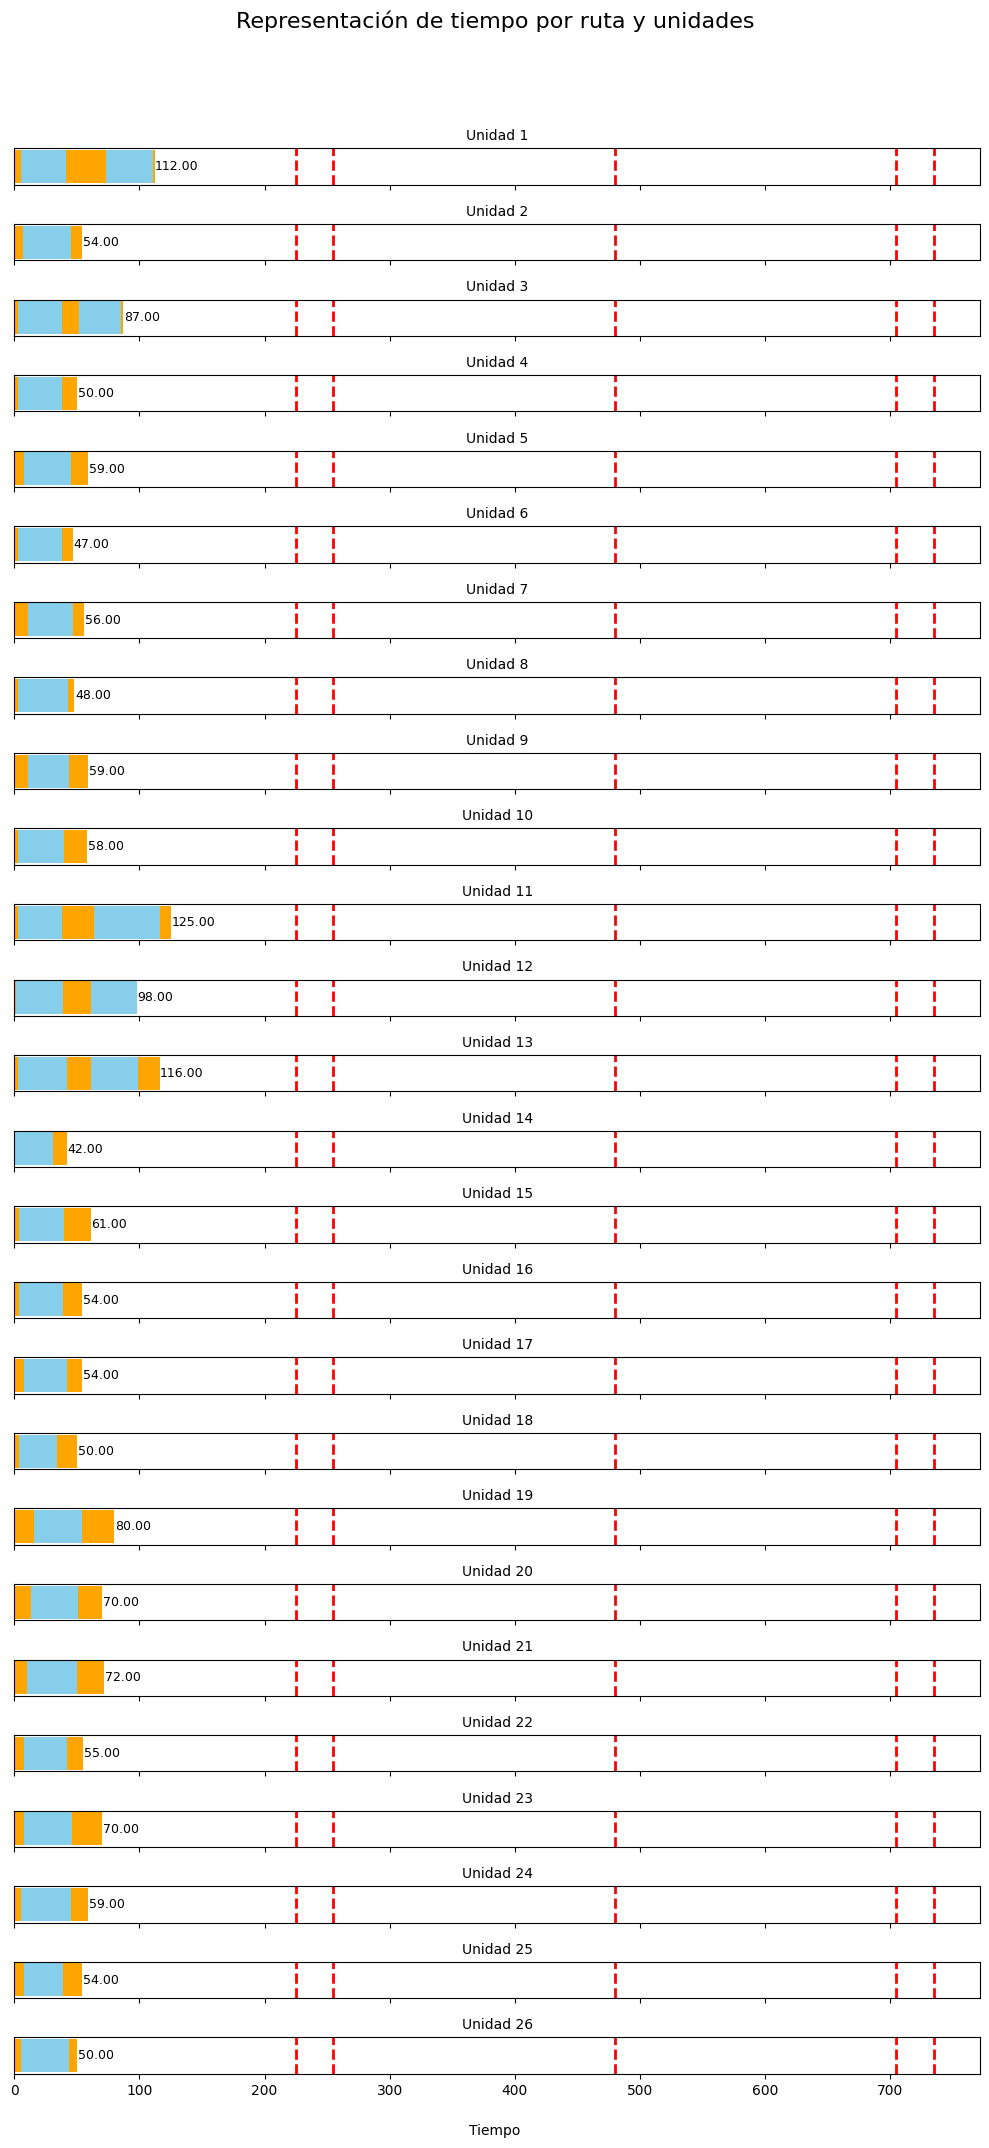

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

asignacion['TIEMPO_VIAJE'] = asignacion['LLEGADA'].apply(hora_a_minutos) - asignacion['SALIDA'].apply(hora_a_minutos)

# Valor umbral para cambiar de color
valor_umbral = 15

# Obtener las unidades únicas
unidades = asignacion['UNIDAD ASIGNADA'].unique()

# Crear un subgráfico por cada unidad
fig, axs = plt.subplots(len(unidades), 1, figsize=(10, len(unidades)*1/1.15), sharex=True)  # Ajustar el tamaño del gráfico

# Valores para las líneas verticales
lineas_verticales = [225, 255, 480, 705, 735]

for i, unidad in enumerate(unidades):
    asignacion_unidad = asignacion[asignacion['UNIDAD ASIGNADA'] == unidad]
    
    Type = []
    Time = []
    Colors = []
    for j, row in asignacion_unidad.iterrows():
        if pd.notna(row['Tiempo en anden']):
            Type.append('A1')
            Time.append(row['Tiempo en anden'])
            # Asignar color según el valor del tiempo en andén
            if row['Tiempo en anden'] < valor_umbral:
                Colors.append('orange')
            else:
                Colors.append('skyblue')
        Type.append('A2')
        Time.append(row['TIEMPO_VIAJE'])
        Colors.append('lightgreen')  # Color fijo para A2
    
    # Create DataFrame and ensure finite values
    data = pd.DataFrame({
        "Type": Type,
        "Time": Time,
        "Colors": Colors
    })
    
    # Remove or replace non-finite values
    data = data[np.isfinite(data['Time'])]
    
    left = 0
    bar_height = 0.3  # Ajustar el ancho de las barras
    for idx, row in data.iterrows():
        axs[i].barh(y=0, width=row['Time'], left=left, color=row['Colors'], height=bar_height)
        left += row['Time']
    
    # Añadir el texto al final de la barra
    total_time = left  # La longitud total de la barra es 'left' después del bucle
    axs[i].text(left + 0.5, 0, f'{total_time:.2f}', va='center', fontsize=9)  # Ajusta 0.5 para dar espacio al texto
    
    axs[i].set_yticks([])
    axs[i].set_title(f'Unidad {unidad}', fontsize=10)

    # Añadir líneas verticales rojas en los valores especificados
    for x_value in lineas_verticales:
        axs[i].axvline(x=x_value, color='red', linestyle='--', linewidth=2)

# Etiquetas comunes
fig.text(0.5, 0.04, 'Tiempo', ha='center')
fig.suptitle('Representación de tiempo por ruta y unidades', fontsize=16)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()
